# 1. Data importing

### 1.1 Using Kaggle API

This step works with Google Colab

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
# find your dataset and copy the API command from Kaggle and paste it here like this
!kaggle datasets download -d michaelkitchener/mbti-type-and-digital-footprints-for-reddit-users

In [ ]:
# the json contain API key, which should be sealed and protected by this line of code
!chmod 600 /content/kaggle.json 

In [ ]:
# unzip the downloaded dataset
!unzip /content/mbti-type-and-digital-footprints-for-reddit-users.zip

### 1.2 Access the data

In [ ]:
import pandas as pd

In [ ]:
# read the extracted csv 
mbti_df = pd.read_csv('/content/reddit_psychometric_data.csv')

In [ ]:
print(f"This dataset has {mbti_df.shape[0]:,} entries \
and {mbti_df.shape[1]:,} rows")

This dataset has 3,586 entries and 27,091 rows


In [ ]:
# show the information about this dataframe
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Columns: 27091 entries, mbti_type to comment_PIED
dtypes: int64(27090), object(1)
memory usage: 741.2+ MB


# 2. Data Cleaning & Preparation

In [ ]:
def replace_entry(df, COLUMN_NAME, WORD, WITH_WORD):
    df.loc[df[COLUMN_NAME].str.contains(WORD), COLUMN_NAME] = WITH_WORD

In [ ]:
for TYPE in ['Introvert', 'Extrovert']:
  replace_entry(mbti_df, 'mbti_type', TYPE[0], TYPE)
  # replace every entry in the column name 'mbti_type'
  # Any that contain 'I' -> 'Introvert'; 'E' -> 'Extrovert'

# 3. Data visualisation

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
def report_scatter(TITLE, THREAD, SAVE =False):
    plt.title(TITLE) # set title name
    sns.set(style='whitegrid')
    sns.scatterplot(
        x=f'post_{THREAD}', #thread is the subreddits that we want to visualise
        y=f'comment_{THREAD}', 
        hue='mbti_type', s=40, # s is the size of dot
        data=mbti_df,
        palette=['steelblue','salmon'] 
    )
    plt.xlabel('Post') # [Post] as x-axis
    plt.ylabel('Comment') # [Comment] as y-axis
    if SAVE is True:
      plt.savefig(f"{TITLE}.png")
    plt.figure(figsize=(10,6))
    plt.show();

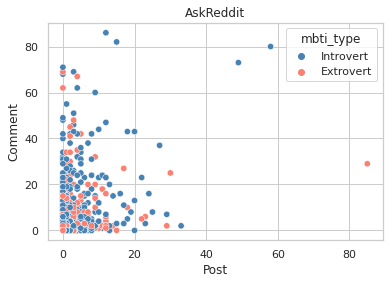

<Figure size 720x432 with 0 Axes>

In [ ]:
report_scatter('AskReddit', 'AskReddit')

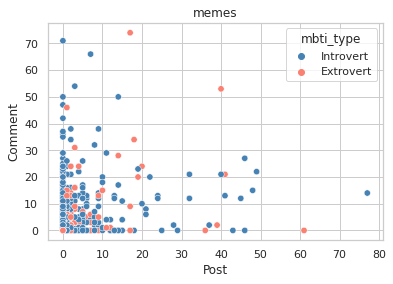

<Figure size 720x432 with 0 Axes>

In [ ]:
report_scatter('memes', 'memes')

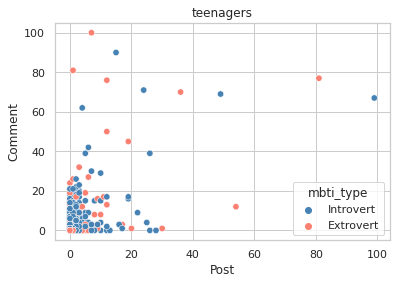

<Figure size 720x432 with 0 Axes>

In [ ]:
report_scatter('teenagers', 'teenagers')

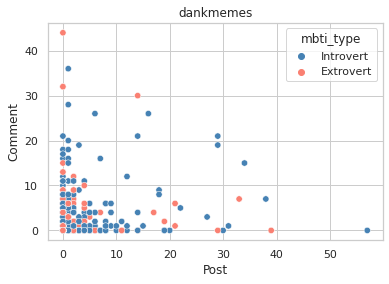

<Figure size 720x432 with 0 Axes>

In [ ]:
report_scatter('dankmemes', 'dankmemes')

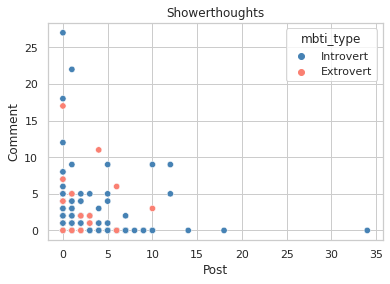

<Figure size 720x432 with 0 Axes>

In [ ]:
report_scatter('Showerthoughts', 'Showerthoughts')

**References**

5 Python Tips that Absolute Beginners Should Know - Thanawat Piyasawetkul - Medium
https://medium.com/@thanawat.pi/5-python-tricks-that-absolute-beginners-should-know-1aa0244ce320

How to Convert Pandas DataFrame into a List – Data to Fish
https://datatofish.com/convert-pandas-dataframe-to-list/

pandas.DataFrame.groupby — pandas 1.5.2 documentation
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

3 Ways to Select One or More Columns with Pandas - Python and R Tips
https://cmdlinetips.com/2020/04/3-ways-to-select-one-or-more-columns-with-pandas/

Pandas: Select first column of dataframe in python – thisPointer
https://thispointer.com/pandas-select-first-column-of-dataframe-in-python/

Pandas DataFrame sum() Method
https://www.w3schools.com/python/pandas/ref_df_sum.asp#:~:text=The%20sum()%20method%20adds,the%20sum%20of%20each%20row.

Python String replace() Method
https://www.w3schools.com/python/ref_string_replace.asp